In [1]:
# import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
# import libraries to collect stock datasets
!pip install -U pandas-datareader # colleec web data
!pip install -U yfinance # collect Yahoo Finance data
!pip install -U finance-datareader # read finance data
!pip install -U pykrx # collect Korean stock market data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 14.0 MB/s eta 0:00:00


In [3]:
from pykrx import stock
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
import yfinance as yf

Load data

In [4]:
#df = stock.get_market_ohlcv_by_date(ticker='000660', fromdate='20180101', todate='20240806') #SK Hynix stock information

#NVIDIA stock information
ticker = 'NVDA'
start_date = '2018-01-01'
end_date = '2024-08-06'
df = yf.download(ticker, start=start_date, end=end_date)

df = df.reset_index(level=0, col_fill='Date')
df = df[['Date', 'Close']]
print(" ")
print(df.head())
print(df.tail())

[*********************100%%**********************]  1 of 1 completed

 
        Date    Close
0 2018-01-02  4.98375
1 2018-01-03  5.31175
2 2018-01-04  5.33975
3 2018-01-05  5.38500
4 2018-01-08  5.55000
           Date       Close
1653 2024-07-30  103.730003
1654 2024-07-31  117.019997
1655 2024-08-01  109.209999
1656 2024-08-02  107.269997
1657 2024-08-05  100.449997


Data processing

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].astype(float)
df = df.set_index('Date')

Feature engineering

In [6]:
# moving average estimation
df['moving_average'] = df['Close'].rolling(window=5).mean()
n = 5
df['PER'] = (df['Close'] - df['Close'].shift(n)) / df['Close'].shift(n) # Price Earnings Ratio, PER

Spliting data

In [7]:
X = df[['moving_average', 'PER']].dropna()
y = df['Close'].dropna()
y = y[5:] # main the same size with X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1322, 2) (331, 2) (1322,) (331,)


ML model training

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print('training set score:', model.score(X_train, y_train))
print("test set score:", model.score(X_test, y_test))

training set score: 0.9985578411918301
test set score: 0.9984503220536336


Model validation

In [10]:
y_pred = model.predict(X_test)
pred = pd.DataFrame({'real value': y_test, 'prediction': y_pred})
pred = pred.sort_values(by='Date')
print(pred.head())
print(pred.tail())

            real value  prediction
Date                              
2018-01-31     6.14500    6.416496
2018-02-12     5.70075    6.224810
2018-02-21     6.03775    6.414463
2018-02-22     6.05375    6.097453
2018-02-26     6.16450    6.183270
            real value  prediction
Date                              
2024-06-21  126.570000  131.307211
2024-07-03  128.279999  125.033314
2024-07-08  128.199997  126.546006
2024-07-19  117.930000  121.898046
2024-07-29  111.589996  114.181075


In [11]:
# Mean Squared Error (MSE) estimation
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  1.041431911388962


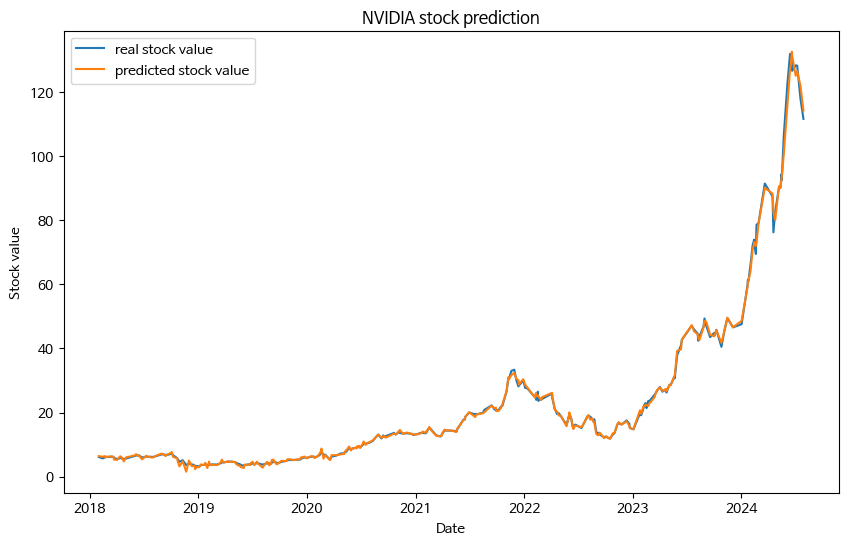

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(pred.index, pred['real value'], label = 'real stock value')
plt.plot(pred.index, pred['prediction'], label = 'predicted stock value')
plt.title('NVIDIA stock prediction')
plt.xlabel('Date')
plt.ylabel('Stock value')
plt.legend()
plt.show()

Future stock value prediction

In [13]:
print(X.tail())

            moving_average       PER
Date                                
2024-07-30      110.981999 -0.153846
2024-07-31      111.535999  0.024245
2024-08-01      110.921999 -0.027342
2024-08-02      109.763998 -0.051212
2024-08-05      107.535999 -0.099830


In [15]:
new_data = {
    'moving_average': [110.981999],
    'PER': [-0.153846]
}

X_new = pd.DataFrame(new_data)

y_pred_new = model.predict(X_new)
print("2024-08-07 predicted stock value:", y_pred_new[0])

2024-08-07 predicted stock value: 109.87565450995862
